https://www.kaggle.com/datasets/ashishjangra27/airbnb-dataset

In [1]:
import pathlib
import os
import zipfile

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
root_dir = pathlib.Path(
    "/content/drive/MyDrive/SDA AI Engineer 2024/ZDAIENGpol2"
)
file_path = root_dir / "Supervised Learning  | sklearn/data/airbnb.csv.zip"
file_path

PosixPath('/content/drive/MyDrive/SDA AI Engineer 2024/ZDAIENGpol2/Supervised Learning  | sklearn/data/airbnb.csv.zip')

In [3]:
df_rbb = pd.read_csv(file_path, index_col=0)
df_rbb.head()

,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,...,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",...,8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,50891766,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",...,5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,49871422,Sapanca Breathable Bungalow,5.0,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...",...,11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,51245886,Bungalov Ev 2,New,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",...,6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm


In [4]:
df_rbb.columns

Index(['id', 'name', 'rating', 'reviews', 'host_name', 'host_id', 'address',
       'features', 'amenities', 'safety_rules', 'hourse_rules', 'img_links',
       'price', 'country', 'bathrooms', 'beds', 'guests', 'toiles', 'bedrooms',
       'studios', 'checkin', 'checkout'],
      dtype='object')

In [5]:
df_rbb.groupby('host_id')['name'].nunique().value_counts()

,count
name,
1,8952
2,920
3,307
4,110
5,45
6,11
7,10
8,8
10,4


In [6]:
df_host_counts = df_rbb.groupby('host_id')['name'].nunique().rename(
    'host_count'
)

# pd.merge(
#     left=df_rbb,
#     right=df_host_counts,
#     how='left',
#     left_on='host_id',
#     right_index=True
# )

In [7]:
df_rbb['host_count'] = df_host_counts.loc[df_rbb['host_id']].values

In [8]:
cols_to_drop = [
    'id',
    'name',
    # 'rating',
    # 'reviews',
    'host_name',
    'host_id',
    # 'address',
    'features',
    'amenities',
    'safety_rules',
    'hourse_rules',
    'img_links',
    # 'price',
    'country',
    # 'bathrooms',
    # 'beds',
    # 'guests',
    # 'toiles',
    # 'bedrooms',
    # 'studios',
    # 'checkin',
    # 'checkout'
]

df_rbb = df_rbb.drop(columns=cols_to_drop)
df_rbb.head()

,rating,reviews,address,price,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout,host_count
0,4.71,64,"Kartepe, Kocaeli, Turkey",8078,1,1,2,0,2,0,Flexible,12 00 pm,1
1,New,0,"Kaş, Antalya, Turkey",4665,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am,6
2,4.85,68,"Imereti, Georgia",5991,1,3,4,0,1,0,After 1 00 pm,12 00 pm,1
3,5.0,13,"Sapanca, Sakarya, Turkey",11339,1,2,4,0,1,0,After 2 00 pm,12 00 pm,1
4,New,0,"Sapanca, Sakarya, Turkey",6673,1,1,2,0,1,0,After 2 00 pm,12 00 pm,1


In [9]:
df_rbb['address_0'] = df_rbb['address'].str.split(',').str[0]
# df_rbb['address_0']

In [10]:
df_rbb_address_0_counter = df_rbb['address_0'].value_counts().loc[df_rbb['address_0']]

In [11]:
df_rbb['address_0'] = np.where(df_rbb_address_0_counter > 50, df_rbb['address_0'], 'other')

In [12]:
# sns.displot(
#     df_rbb['address'].str.split(',').str[0].value_counts()
# )

# plt.yscale("symlog")

In [13]:
df_rbb['address_0'].value_counts()

,count
address_0,
other,11046
Pantelleria,199
New Delhi,191
Gudauri,191
Manali,181
Marrakesh,114
Trinidad,105
Sapanca,99
Marrakech,82


In [14]:
# df_rbb['country'].value_counts()

In [15]:
# df_rbb['checkin'].value_counts()
# df_rbb['checkout'].value_counts()

In [16]:
df_rbb = df_rbb.drop(columns=['address', 'checkout', 'checkin'])

In [17]:
df_rbb_rating = np.where(
    df_rbb['rating'] == 'New',
    np.NaN,
    df_rbb['rating']
)

In [18]:
df_rbb_rating_mean = pd.Series(df_rbb_rating.astype(float)).dropna().mean()

In [19]:
df_rbb_rating = np.where(
    pd.Series(df_rbb_rating).isna(),
    df_rbb_rating_mean,
    df_rbb['rating']
).astype(float)

In [20]:
df_rbb['rating'] = df_rbb_rating

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'guests'}>,
        <Axes: title={'center': 'toiles'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'studios'}>,
        <Axes: title={'center': 'host_count'}>]], dtype=object)

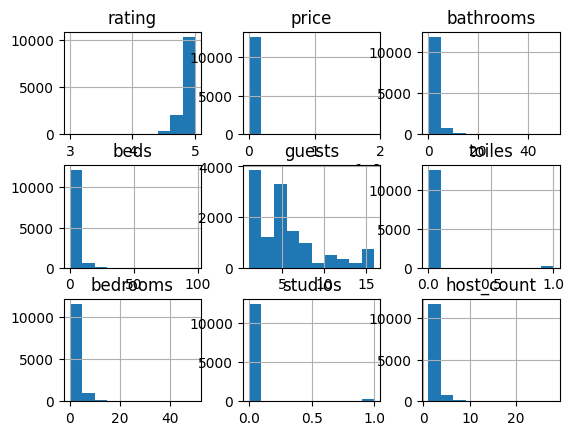

In [21]:
df_rbb.hist()

In [22]:
# dla host_count i bedrooms,  beds, bathrooms zmienne odstajace

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
# df_rbb = df_rbb.drop(columns=['country'])
# df_rbb.head()

In [25]:
df_rbb['reviews'].nunique()

409

In [26]:
df_rbb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12805 entries, 0 to 12804
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rating      12805 non-null  float64
 1   reviews     12805 non-null  object 
 2   price       12805 non-null  int64  
 3   bathrooms   12805 non-null  int64  
 4   beds        12805 non-null  int64  
 5   guests      12805 non-null  int64  
 6   toiles      12805 non-null  int64  
 7   bedrooms    12805 non-null  int64  
 8   studios     12805 non-null  int64  
 9   host_count  12805 non-null  int64  
 10  address_0   12805 non-null  object 
dtypes: float64(1), int64(8), object(2)
memory usage: 1.2+ MB


In [29]:
# df_rbb['reviews'].astype(int)

In [30]:
df_rbb['reviews'] = df_rbb['reviews'].str.replace(',', '').astype(int)

In [31]:
# df_rbb['country'].value_counts()

In [32]:
encoder = OneHotEncoder(sparse_output=False)
df_rbb_address_0_ohe = encoder.fit_transform(df_rbb[['address_0']])
df_rbb_address_0_ohe

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [33]:
df_rbb_address_0_ohe = pd.DataFrame(
    df_rbb_address_0_ohe,
    columns=encoder.get_feature_names_out()
)

In [34]:
df_rbb = pd.concat([df_rbb, df_rbb_address_0_ohe], axis=1)
df_rbb.head()

,rating,reviews,price,bathrooms,beds,guests,toiles,bedrooms,studios,host_count,...,address_0_Mumbai,address_0_New Delhi,address_0_Pantelleria,address_0_Rishikesh,address_0_Sapanca,address_0_Srinagar,address_0_Tambon Rawai,address_0_Trinidad,address_0_Wadi Rum Village,address_0_other
0,4.710000,64,8078,1,1,2,0,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.857475,0,4665,2,2,4,0,2,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.850000,68,5991,1,3,4,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5.000000,13,11339,1,2,4,0,1,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.857475,0,6673,1,1,2,0,1,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df_rbb = df_rbb.drop(columns=['address_0'])

In [36]:
df_rbb

,rating,reviews,price,bathrooms,beds,guests,toiles,bedrooms,studios,host_count,...,address_0_Mumbai,address_0_New Delhi,address_0_Pantelleria,address_0_Rishikesh,address_0_Sapanca,address_0_Srinagar,address_0_Tambon Rawai,address_0_Trinidad,address_0_Wadi Rum Village,address_0_other
0,4.710000,64,8078,1,1,2,0,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.857475,0,4665,2,2,4,0,2,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.850000,68,5991,1,3,4,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5.000000,13,11339,1,2,4,0,1,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.857475,0,6673,1,1,2,0,1,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12800,4.940000,16,4288,8,0,4,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12801,4.670000,6,15200,0,1,2,1,1,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12802,4.670000,3,9103,1,2,2,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12803,4.860000,7,42262,2,4,8,0,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    df_rbb.drop(columns=['price']),
    df_rbb['price'],
    test_size=0.2,
    random_state=42
)

In [38]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
print(model_lr.score(X_train, y_train))
print(model_lr.score(X_test, y_test))

0.1739262009106547
0.07482272634295084


In [39]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)
print(model_lr.score(X_train_scaled, y_train))
print(model_lr.score(X_test_scaled, y_test))

0.17392572374807513
0.07506187714056212


In [41]:
df_rbb.iloc[:, :-19]

,rating,reviews,price,bathrooms,beds,guests,toiles,bedrooms,studios,host_count
0,4.710000,64,8078,1,1,2,0,2,0,1
1,4.857475,0,4665,2,2,4,0,2,0,6
2,4.850000,68,5991,1,3,4,0,1,0,1
3,5.000000,13,11339,1,2,4,0,1,0,1
4,4.857475,0,6673,1,1,2,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
12800,4.940000,16,4288,8,0,4,0,0,0,2
12801,4.670000,6,15200,0,1,2,1,1,0,4
12802,4.670000,3,9103,1,2,2,0,1,0,1
12803,4.860000,7,42262,2,4,8,0,2,0,1


In [42]:
model_lr = LinearRegression()
model_lr.fit(X_train_scaled[:, :-19], y_train)
print(model_lr.score(X_train_scaled[:, :-19], y_train))
print(model_lr.score(X_test_scaled[:, :-19], y_test))

0.16475679562359102
0.07216710507364166


In [43]:
from sklearn.preprocessing import KBinsDiscretizer

est = KBinsDiscretizer(
    n_bins=7, encode='ordinal', strategy='uniform'
)
X_train.loc[:, 'reviews'] = est.fit_transform(X_train_scaled[:, 1].reshape(-1, 1))
X_test.loc[:, 'reviews'] = est.transform(X_test_scaled[:, 1].reshape(-1, 1))

In [44]:
# pd.DataFrame(output).value_counts()

In [45]:
X_train.iloc[:, :-19].columns

Index(['rating', 'reviews', 'bathrooms', 'beds', 'guests', 'toiles',
       'bedrooms', 'studios', 'host_count'],
      dtype='object')

In [46]:
X_test.iloc[:, :-19].columns

Index(['rating', 'reviews', 'bathrooms', 'beds', 'guests', 'toiles',
       'bedrooms', 'studios', 'host_count'],
      dtype='object')

In [47]:
model_lr = LinearRegression()
model_lr.fit(X_train.iloc[:, :-19], y_train)
print(model_lr.score(X_train.iloc[:, :-19], y_train))
print(model_lr.score(X_test.iloc[:, :-19], y_test))

0.16453215123575515
0.07091037667852307


In [48]:
X_train.iloc[:, :-20].shape

(10244, 8)

In [49]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train.iloc[:, :-19], y_train)
print(model_rf.score(X_train.iloc[:, :-19], y_train))
print(model_rf.score(X_test.iloc[:, :-19], y_test))

0.7614848775451811
-0.05942374709922782


In [50]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
print(model_rf.score(X_train, y_train))
print(model_rf.score(X_test, y_test))

0.7883682365319757
-0.07964800157036911


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train.iloc[:, :-19], y_train)
print(model_rf.score(X_train.iloc[:, :-19], y_train))
print(model_rf.score(X_test.iloc[:, :-19], y_test))

0.7558699244547814
-0.04981733593575455


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define the parameter grid
param_grid = {
    # 'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2'
)
grid_search.fit(X_train.iloc[:, :-19], y_train)

# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Evaluate the model with the best parameters on the test set
best_rf = grid_search.best_estimator_
print("Test set score: ", best_rf.score(X_test.iloc[:, :-19], y_test))


KeyboardInterrupt: 

In [52]:
best_rf

NameError: name 'best_rf' is not defined

In [53]:
print(best_rf.score(X_train.iloc[:, :-19], y_train))
print(best_rf.score(X_test.iloc[:, :-19], y_test))

NameError: name 'best_rf' is not defined

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define the parameter grid
param_grid = {
    # 'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2'
)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Evaluate the model with the best parameters on the test set
best_rf = grid_search.best_estimator_
print("Test set score: ", best_rf.score(X_test, y_test))


Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best cross-validation score:  0.19281758277061964
Test set score:  0.21087273149720276


In [ ]:
print(best_rf.score(X_train, y_train))
print(best_rf.score(X_test, y_test))

0.3997770255446237
0.21087273149720276


In [54]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [55]:
model_lr = LinearRegression()
model_lr.fit(X_train_poly, y_train)
print(model_lr.score(X_train_poly, y_train))
print(model_lr.score(X_test_poly, y_test))

0.23507865021812735
-0.04493116475900982


In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_poly_pca_2 = pca.fit_transform(X_train_poly)
X_test_poly_pca_2 = pca.transform(X_test_poly)

model_lr = LinearRegression()
model_lr.fit(X_train_poly_pca_2, y_train)

print(model_lr.score(X_train_poly_pca_2, y_train))
print(model_lr.score(X_test_poly_pca_2, y_test))

0.13421550558433482
0.062448078584633526


In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train_poly_pca_2 = pca.fit_transform(X_train)
X_test_poly_pca_2 = pca.transform(X_test)

model_lr = LinearRegression()
model_lr.fit(X_train_poly_pca_2, y_train)

print(model_lr.score(X_train_poly_pca_2, y_train))
print(model_lr.score(X_test_poly_pca_2, y_test))

0.1673360789484244
0.06985135024948985


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define the parameter grid
param_grid = {
    # 'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2'
)
grid_search.fit(X_train_poly_pca_2, y_train)

# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score:  0.1910974261998006


ValueError: Found input variables with inconsistent numbers of samples: [2561, 10244]

In [ ]:
# Evaluate the model with the best parameters on the test set
best_rf = grid_search.best_estimator_
print("Test set score: ", best_rf.score(X_test_poly_pca_2, y_test))

Test set score:  0.14734915312890096


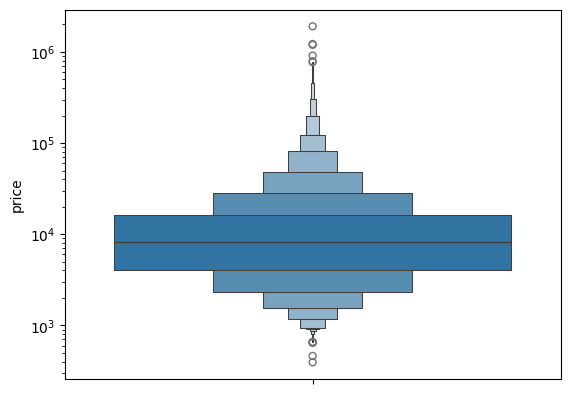

In [ ]:
sns.boxenplot(y_train)

plt.yscale('log')

In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

pca = PCA(n_components=10)
X_train_poly_pca_2 = pca.fit_transform(X_train_poly)
X_test_poly_pca_2 = pca.transform(X_test_poly)

model_lr = KNeighborsClassifier(n_neighbors=2)
model_lr.fit(X_train_poly_pca_2, y_train)

print(model_lr.score(X_train_poly_pca_2, y_train))
print(model_lr.score(X_test_poly_pca_2, y_test))

0.3676298320968372
0.014057008980866849
